In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
from datetime import datetime

In [3]:
df = pd.read_csv('fbProphetData.csv')

In [4]:
from fbprophet import Prophet

C:\Users\Atharva\anaconda3\envs\stan_env_test\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981913 entries, 0 to 9981912
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ds                   object
 1   y                    int64 
 2   PriorIncident1Day    int64 
 3   PriorIncident2Days   int64 
 4   PriorIncident3Days   int64 
 5   PriorIncident7Days   int64 
 6   PriorIncident14Days  int64 
 7   PriorIncident30Days  int64 
 8   PriorIncident60Days  int64 
 9   GridSmallId          int64 
dtypes: int64(9), object(1)
memory usage: 761.6+ MB


In [6]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981913 entries, 0 to 9981912
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ds                   datetime64[ns]
 1   y                    int64         
 2   PriorIncident1Day    int64         
 3   PriorIncident2Days   int64         
 4   PriorIncident3Days   int64         
 5   PriorIncident7Days   int64         
 6   PriorIncident14Days  int64         
 7   PriorIncident30Days  int64         
 8   PriorIncident60Days  int64         
 9   GridSmallId          int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 761.6 MB


In [8]:
df.head()

,ds,y,PriorIncident1Day,PriorIncident2Days,PriorIncident3Days,PriorIncident7Days,PriorIncident14Days,PriorIncident30Days,PriorIncident60Days,GridSmallId
0,2022-01-01,0,0,0,0,0,0,0,0,11812
1,2022-01-01,0,0,0,0,0,0,0,0,24917
2,2022-01-01,0,0,0,0,0,0,0,0,24916
3,2022-01-01,0,0,0,0,0,0,0,0,24915
4,2022-01-01,0,0,0,0,0,0,0,0,24914


In [9]:
df['GridSmallId'].value_counts()

19316    895
21664    703
25726    646
22070    630
21663    627
        ... 
11212    243
3016     243
27588    243
19392    243
8188     243
Name: GridSmallId, Length: 40000, dtype: int64

In [23]:
indx = []
single_df = pd.DataFrame()

# Searching in whole column
for i in range(len(df.GridSmallId)):
    if 21410 == df.GridSmallId[i]:
          
        # indx will store the tuple having that 
        # particular value in column.
        indx.append(i)
        for indexes in indx:
            single_df = single_df.append(df.iloc[indexes])
  
# below line will print that tuple
single_df

,GridSmallId,PriorIncident14Days,PriorIncident1Day,PriorIncident2Days,PriorIncident30Days,PriorIncident3Days,PriorIncident60Days,PriorIncident7Days,ds,y
3739,21410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-01,1.0
3739,21410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-01,1.0
3740,21410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-01,1.0
3739,21410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-01,1.0
3740,21410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...
9787458,21410.0,11.0,0.0,0.0,8.0,0.0,0.0,0.0,2022-08-27,0.0
9827460,21410.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,2022-08-28,0.0
9867363,21410.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,2022-08-29,0.0
9907470,21410.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,2022-08-30,0.0


In [24]:
df_1 = single_df.astype({"GridSmallId":'int', "PriorIncident14Days":'int', "PriorIncident1Day":'int', "PriorIncident2Days":'int', "PriorIncident3Days":'int', "PriorIncident30Days":'int', "PriorIncident60Days":'int' , "PriorIncident7Days":'int' , "y":'int'})
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40186 entries, 3739 to 9947477
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   GridSmallId          40186 non-null  int32         
 1   PriorIncident14Days  40186 non-null  int32         
 2   PriorIncident1Day    40186 non-null  int32         
 3   PriorIncident2Days   40186 non-null  int32         
 4   PriorIncident30Days  40186 non-null  int32         
 5   PriorIncident3Days   40186 non-null  int32         
 6   PriorIncident60Days  40186 non-null  int32         
 7   PriorIncident7Days   40186 non-null  int32         
 8   ds                   40186 non-null  datetime64[ns]
 9   y                    40186 non-null  int32         
dtypes: datetime64[ns](1), int32(9)
memory usage: 2.0 MB


In [40]:
my_model = Prophet(daily_seasonality=True)

In [41]:
df_prophet = df_1[['y', 'ds']]
df_prophet

,y,ds
3739,1,2022-01-01
3739,1,2022-01-01
3740,1,2022-01-01
3739,1,2022-01-01
3740,1,2022-01-01
...,...,...
9787458,0,2022-08-27
9827460,0,2022-08-28
9867363,0,2022-08-29
9907470,0,2022-08-30


In [42]:
my_model.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
future_dates = my_model.make_future_dataframe(periods = 365)
future_dates.tail()

,ds
603,2023-08-27
604,2023-08-28
605,2023-08-29
606,2023-08-30
607,2023-08-31


In [44]:
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,0.880902,0.108002,1.180941,0.880902,0.880902,-0.230684,-0.230684,-0.230684,-0.305809,-0.305809,-0.305809,0.075125,0.075125,0.075125,0.0,0.0,0.0,0.650218
1,2022-01-02,0.851277,-0.271316,0.821608,0.851277,0.851277,-0.598990,-0.598990,-0.598990,-0.305809,-0.305809,-0.305809,-0.293182,-0.293182,-0.293182,0.0,0.0,0.0,0.252287
2,2022-01-03,0.821653,-0.088399,1.007073,0.821653,0.821653,-0.357484,-0.357484,-0.357484,-0.305809,-0.305809,-0.305809,-0.051675,-0.051675,-0.051675,0.0,0.0,0.0,0.464169
3,2022-01-04,0.792029,-0.088876,1.014526,0.792029,0.792029,-0.360609,-0.360609,-0.360609,-0.305809,-0.305809,-0.305809,-0.054800,-0.054800,-0.054800,0.0,0.0,0.0,0.431420
4,2022-01-05,0.762404,-0.006012,1.114574,0.762404,0.762404,-0.223970,-0.223970,-0.223970,-0.305809,-0.305809,-0.305809,0.081839,0.081839,0.081839,0.0,0.0,0.0,0.538434


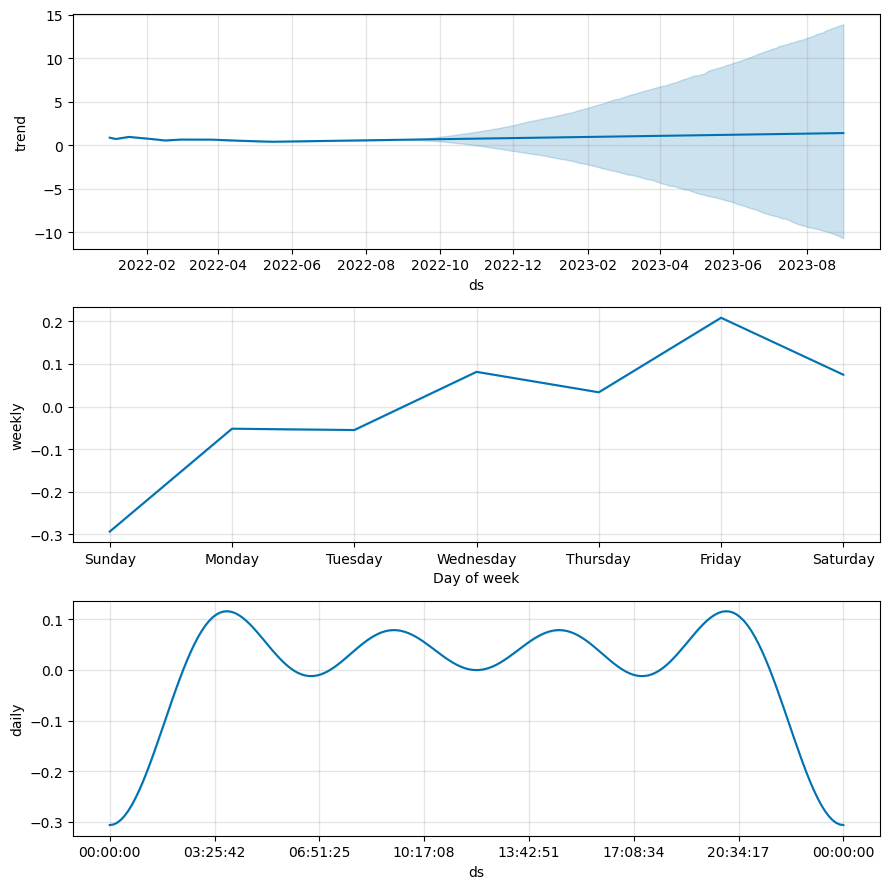

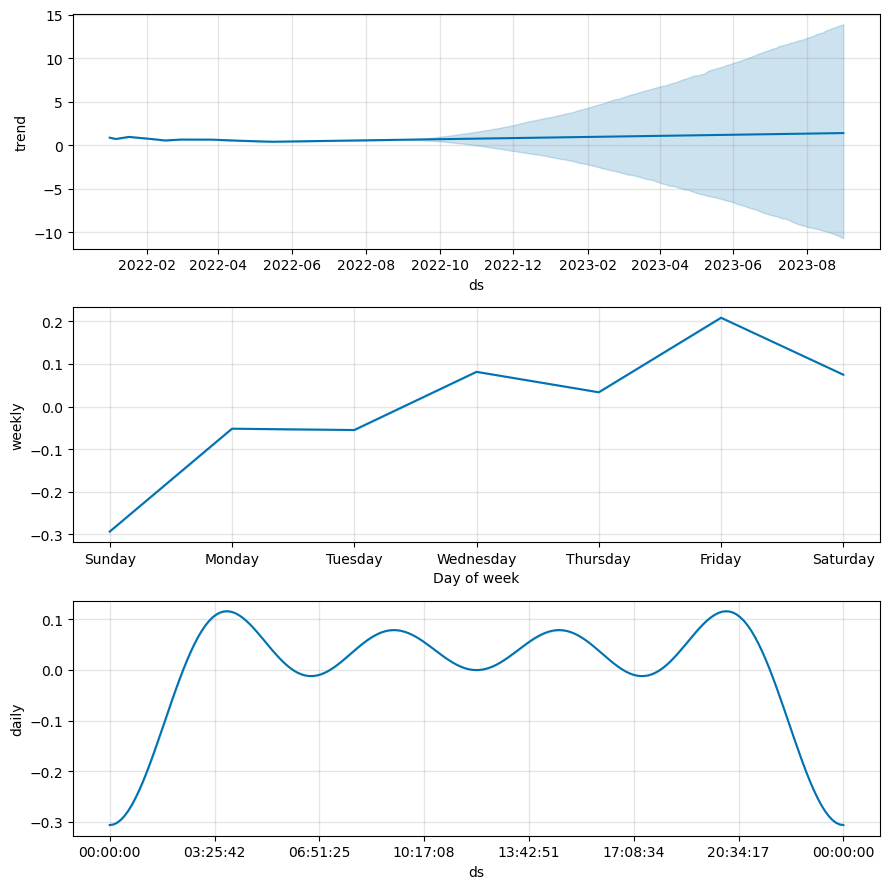

In [45]:
my_model.plot_components(forecast)